<a href="https://colab.research.google.com/github/riamsnow/FutureMakers/blob/main/houseprices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd "/content/drive/My Drive/FutureMakers"

/content/drive/My Drive/FutureMakers


In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('housepricedata.csv')

In [8]:
dataset = df.values

In [9]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [10]:
X = dataset[:,0:10]

In [11]:
Y = dataset[:,10]

In [12]:
from sklearn import preprocessing

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [14]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [17]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [18]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [21]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 15s 22ms/step - loss: 0.6969 - accuracy: 0.5165 - val_loss: 0.6874 - val_accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5440 - val_loss: 0.6754 - val_accuracy: 0.7306
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.7246 - val_loss: 0.6640 - val_accuracy: 0.8082
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.7737 - val_loss: 0.6532 - val_accuracy: 0.8037
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.7985 - val_loss: 0.6431 - val_accuracy: 0.8128
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.7849 - val_loss: 0.6339 - val_accuracy: 0.8082
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.7699 - val_loss: 0.6241 - val_accuracy: 0.8082
Epoch 8/100

In [23]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9132


0.913241982460022

In [24]:
import matplotlib.pyplot as plt

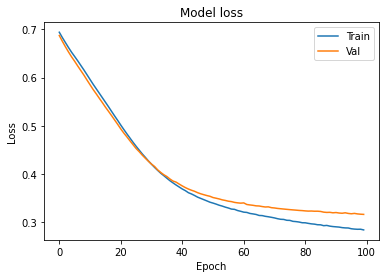

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()